In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logomaker

In [5]:
iso_sim = pd.read_csv('../data/bigo.csv')
iso_sim = iso_sim[:len(iso_sim)-1]
iso_sim

,seq_len,iso_count,n_dons,n_accs,time
0,300,0,1,4,0.000015
1,300,0,1,6,0.000012
2,300,0,3,1,0.000011
3,300,0,4,1,0.000010
4,300,0,3,2,0.000010
...,...,...,...,...,...
1895,1200,3674284992,44,50,5579.225449
1896,1200,3143083259,54,46,3402.269098
1897,1200,10550340359,52,52,15370.186402
1898,1200,10709534879,48,50,10133.434150


In [6]:
xt_labs = [x for x in iso_sim['seq_len'].unique() if x % 100 == 0]

Text(0.5, 1.05, 'Simulated APC Isoform Counts')

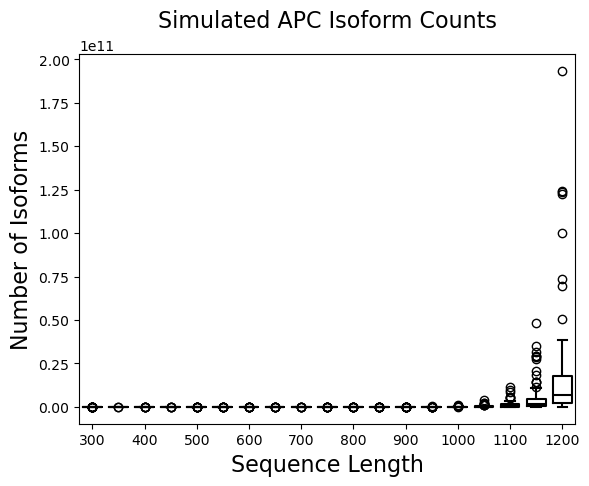

In [20]:
sim_bplot = sns.boxplot(data=iso_sim, x='seq_len', y='iso_count', fill=False, gap=.1, color='black')
sim_bplot.set_xticks(range(len(iso_sim['seq_len'].unique())))
sim_bplot.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18], xt_labs)
sim_bplot.set_xlabel("Sequence Length", fontsize='16')
sim_bplot.set_ylabel("Number of Isoforms", fontsize='16')
sim_bplot.set_title("Simulated APC Isoform Counts", fontsize='16', y=1.05)

Figure 1
The APC algorithm was run on randomly generated sequences of varying length and the number of isoforms was recorded. GT/AG dinucleotides were randomly inserted at a frequency derived from the smallgenes dataset. The number of possible isoforms begins to rise sharply when the sequence length passes 1100 bp. Sequences greater than 1200 bp in length would have taken too long to finish computing to be included in this figure. Simulation was run on a Ryzen 5800X CPU.

In [9]:
pwm20 = pd.read_csv('sg_rnaseq_pwm_20bp.csv', header=None)
pwm20.head(10)

,0,1,2,3,4
0,smallgenes_rnaseq_relative_donpwm,0.032819,0.014615,0.014838,0.026514
1,smallgenes_rnaseq_relative_donpwm,0.019318,0.009823,0.010735,0.013278
2,smallgenes_rnaseq_relative_donpwm,0.038890,0.024539,0.018565,0.014966
3,smallgenes_rnaseq_relative_donpwm,0.143828,0.038324,0.031651,0.060549
4,smallgenes_rnaseq_relative_donpwm,0.069109,0.033438,0.244270,0.063508
5,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,2.000000,0.000000
6,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,0.000000,2.000000
7,smallgenes_rnaseq_relative_donpwm,0.364980,0.008178,0.122333,0.095131
8,smallgenes_rnaseq_relative_donpwm,0.517074,0.041288,0.053633,0.111615
9,smallgenes_rnaseq_relative_donpwm,0.075285,0.026691,0.704060,0.103733


In [10]:
pwm20_don = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_donpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_don.head(5)

,A,C,G,T
0,0.032819,0.014615,0.014838,0.026514
1,0.019318,0.009823,0.010735,0.013278
2,0.038890,0.024539,0.018565,0.014966
3,0.143828,0.038324,0.031651,0.060549
4,0.069109,0.033438,0.244270,0.063508


In [11]:
pwm20_acc = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_accpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_acc.head(5)

,A,C,G,T
20,0.142444,0.043767,0.019292,0.100835
21,0.080952,0.033386,0.019210,0.086678
22,0.077257,0.032734,0.021609,0.100955
23,0.064045,0.027519,0.020824,0.077475
24,0.073747,0.031291,0.020163,0.086534


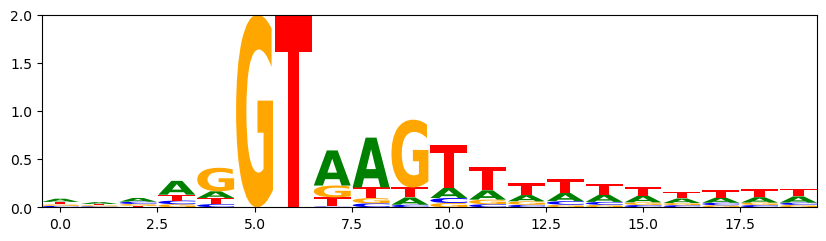

In [12]:
don20_logo = logomaker.Logo(pwm20_don, shade_below=.5, fade_below=.5)

This pwm suggests the donor site should include 2 base pairs upstream, into the exon sequence. The main donor site should also be 7 base pairs long. Suggested donor site motif would be AGGTAAGTT.

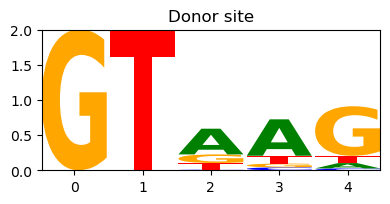

In [13]:
fig, ax = plt.subplots(1,1,figsize=[4,2])

don5_pwm = pwm20_don[5:10].reset_index(drop=True)
don5_logo = logomaker.Logo(don5_pwm, ax=ax, shade_below=.5, fade_below=.5)

don5_logo.fig.tight_layout()
plt.title('Donor site')
plt.show
plt.savefig('don5pwm.svg', format='svg')

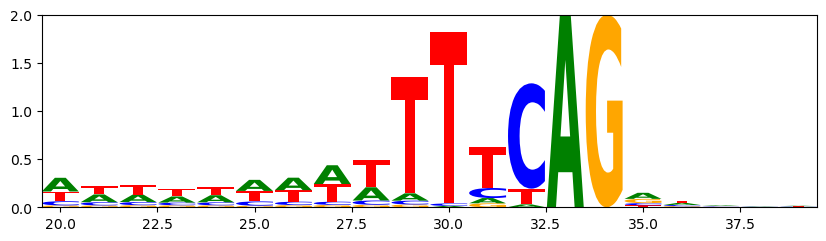

In [14]:
pwm20_acc_plt = logomaker.Logo(pwm20_acc, shade_below=.5, fade_below=.5)

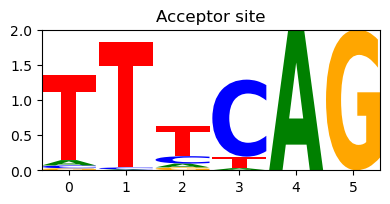

In [15]:
fig, ax = plt.subplots(1,1,figsize=[4,2])

acc5_pwm = pwm20_acc[9:15].reset_index(drop=True)
acc5_logo = logomaker.Logo(acc5_pwm, ax=ax, shade_below=.5, fade_below=.5)

acc5_logo.fig.tight_layout()
plt.title('Acceptor site')
plt.show
plt.savefig('acc6pwm.svg', format='svg')

This pwm suggests the acceptor site should be 8 base pairs long, with a top scoring motif being ATTTTCAG.

In [17]:
dists = pd.read_csv('apc_distances_original.csv')
# need to use .copy() to create new object, not a temporary object
# https://towardsdatascience.com/pandas-from-messy-to-beautiful-b03b0c32f767/
dists

,gene_id,apc_base,apc_optiso,apc_nmd,apc_optiso_nmd
0,3.600,5.015610e-01,0.626356,0.626006,0.659125
1,1.425,1.592604e-03,0.126165,0.001593,0.170085
2,1.282,3.330669e-16,0.332309,0.000000,0.357598
3,2.295,3.405730e-01,0.015485,0.660382,0.015485
4,1.180,4.855502e-01,0.713721,0.496721,0.773157
...,...,...,...,...,...
916,1.165,9.751574e-03,0.428739,0.432548,0.457181
917,1.416,3.318186e-01,0.227014,0.338743,0.977307
918,2.420,8.120974e-01,0.958686,0.958254,0.958713
919,2.580,4.371044e-01,0.799091,0.700914,0.865563


In [18]:
dists.loc[:, 'base_to_opt_nmd'] = dists['apc_optiso_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_nmd'] = dists['apc_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_opt'] = dists['apc_optiso'] - dists['apc_base']

In [19]:
dists.sort_values(by='apc_base', ascending=True)
pd.set_option('display.max_rows', 20)
#dists

In [20]:
dists.sort_values(by='base_to_opt_nmd', ascending=True)

,gene_id,apc_base,apc_optiso,apc_nmd,apc_optiso_nmd,base_to_opt_nmd,base_to_nmd,base_to_opt
27,1.147,0.951728,0.963256,0.422737,0.350203,-0.601526,-0.528991,0.011527
714,2.230,0.533133,0.062836,0.650060,0.062836,-0.470298,0.116926,-0.470298
864,1.200,0.496422,0.924188,0.481618,0.039409,-0.457012,-0.014804,0.427767
603,2.108,0.441418,0.032608,0.498653,0.008475,-0.432943,0.057235,-0.408811
793,3.680,0.490504,0.063961,0.628152,0.063961,-0.426543,0.137648,-0.426543
...,...,...,...,...,...,...,...,...
694,1.386,0.016312,0.944550,0.019233,0.962986,0.946674,0.002921,0.928238
770,1.402,0.004737,0.938927,0.706976,0.972535,0.967798,0.702239,0.934190
586,1.430,0.000258,0.950056,0.021843,0.973105,0.972846,0.021585,0.949798
277,1.415,0.010764,0.920031,0.422572,0.984551,0.973786,0.411807,0.909266


Some genes get worse the more optimizations you add. Let's look at gene 2.230.

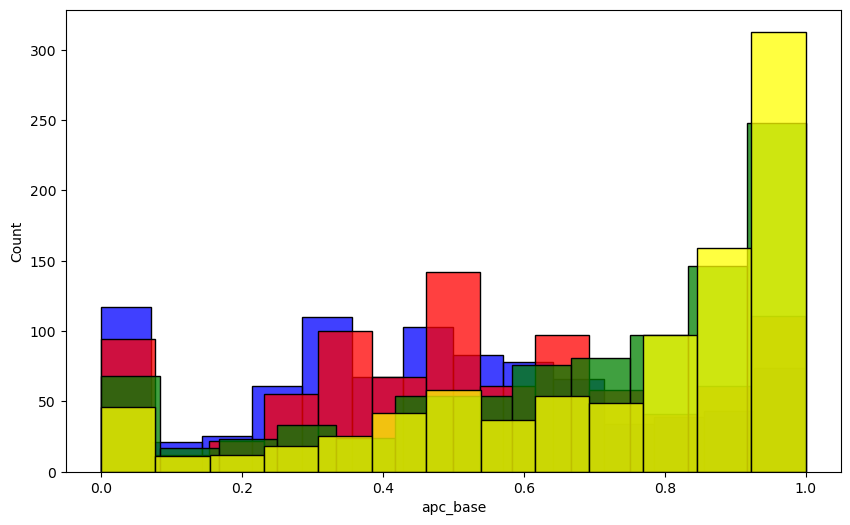

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dists, color='blue', x='apc_base')
sns.histplot(data=dists, color='red', x='apc_nmd')
sns.histplot(data=dists, color='green', x='apc_optiso')
sns.histplot(data=dists, color='yellow', x='apc_optiso_nmd')
plt.show()

In [22]:
base_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_base'])
nmd_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_nmd'])
optiso_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_optiso'])
optiso_nmd_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_optiso_nmd'])

In [23]:
vert_df = pd.concat([base_vals, nmd_vals, optiso_vals, optiso_nmd_vals], axis=0)
vert_df

,gene_id,variable,value
0,3.600,apc_base,5.015610e-01
1,1.425,apc_base,1.592604e-03
2,1.282,apc_base,3.330669e-16
3,2.295,apc_base,3.405730e-01
4,1.180,apc_base,4.855502e-01
...,...,...,...
916,1.165,apc_optiso_nmd,4.571805e-01
917,1.416,apc_optiso_nmd,9.773069e-01
918,2.420,apc_optiso_nmd,9.587134e-01
919,2.580,apc_optiso_nmd,8.655627e-01


<Axes: xlabel='value', ylabel='Count'>

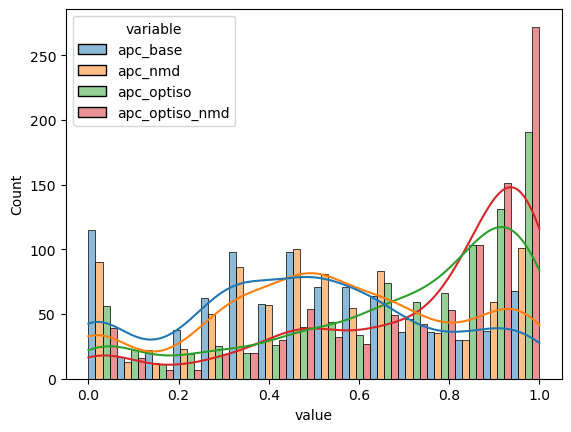

In [24]:
sns.histplot(data=vert_df, x='value', hue='variable', multiple='dodge', kde=True)

In [25]:
# check trends for up2


In [26]:
# ranks genes by biggest improvements to distance

In [27]:
# plot exon/intron length model for export into apc.svg
elen = pd.read_csv('../data/models/exon.len')
elen = elen.rename(columns={elen.columns[0]: 'Probability'})
elen.loc[:, 'Length'] = elen.index
elen

,Probability,Length
0,0.000000,0
1,0.000000,1
2,0.000000,2
3,0.000000,3
4,0.000000,4
...,...,...
995,0.000008,995
996,0.000008,996
997,0.000008,997
998,0.000008,998


In [28]:
ilen = pd.read_csv('../data/models/intron.len')
ilen = ilen.rename(columns={ilen.columns[0]: 'Probability'})
ilen.loc[:, 'Length'] = ilen.index
ilen

,Probability,Length
0,0.000000,0
1,0.000000,1
2,0.000000,2
3,0.000000,3
4,0.000000,4
...,...,...
995,0.000007,995
996,0.000006,996
997,0.000006,997
998,0.000006,998


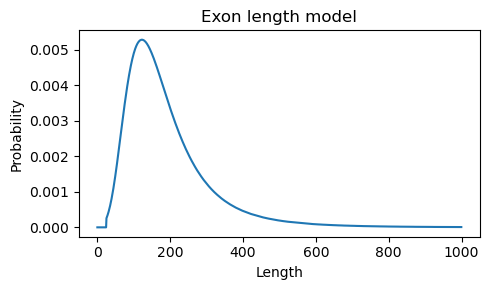

In [29]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=elen, x='Length', y='Probability').set(title='Exon length model')
plt.tight_layout()
plt.savefig('elen.svg', format='svg')

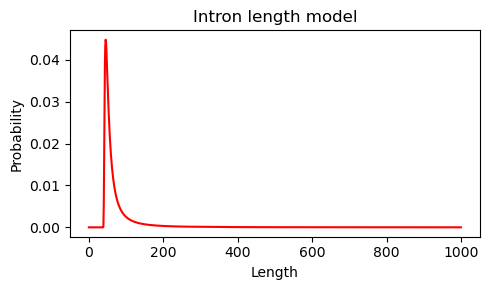

In [30]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=ilen, x='Length', y='Probability', color='red').set(title='Intron length model')
plt.tight_layout()
plt.savefig('ilen.svg', format='svg')

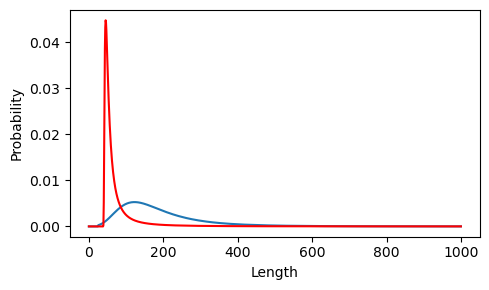

In [31]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=elen, x='Length', y='Probability')
sns.lineplot(data=ilen, x='Length', y='Probability', color='red')
plt.tight_layout()